# Preprocesamiento

En esta cuarta etapa se van a tomar decisiones en línea con las estadísticas y análisis con tal de  preparar correctamente los datos que serán parte del entrenamiento y posterior validación de los modelos de predicción.

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
from nilmtk import DataSet
import warnings
from nilmtk import TimeFrame
warnings. filterwarnings("ignore")
plt.style.use('bmh')



In [2]:
#dataset de referencia 
deps = DataSet('dsualmh.h5')

elec=deps.buildings[1].elec # Todos los medidores



labels = pd.DataFrame({'Instances': list(range(1,12)),
                       'Meters': ['Main', 'Electric furnace', 'Microwave','Television','Kettle','Vacuum cleaner','Electric space heater','Electric shower heater','Fan','Fridge','Freezer']})

Meters={}
for x in range(len(labels)): Meters[elec[x+1]]=labels['Meters'][x]

## Cambio en el muestreo de datos e interpolación

Veamos si hay  seccion faltante

In [3]:
tf=elec[1].good_sections(full_results=True).combined()[0]
tf

TimeFrame(start='2023-03-07 11:10:38+01:00', end='2023-03-07 13:12:15+01:00', empty=False)

 Muestreo cada 10 segundos, promediando datos (mean)  y usando metodo relleno=ffill

In [4]:
ta = '2023-03-07 11:10:38+01:00' #tiempo inicial
tb = '2023-03-07 13:12:15+01:00' #tiempo final

next(elec[1].load(sample_period=10, resample_kwargs={'fill_method':'ffill', 'how': 'mean'}))[ta:tb]

physical_quantity           voltage                           power   current  \
type                       armonic7 armonic11    armonic1 armonic25 armonic36   
2023-03-07 11:10:40+01:00  3.352972  0.293922  247.049332  0.001028  0.001019   
2023-03-07 11:10:50+01:00  3.219592  0.272650  246.843719  0.001224  0.001116   
2023-03-07 11:11:00+01:00  2.983778  0.157928  245.637543  0.001623  0.002319   
2023-03-07 11:11:10+01:00  2.990428  0.309708  237.450043  0.003031  0.004158   
2023-03-07 11:11:20+01:00  2.988905  0.332883  237.412857  0.002612  0.004747   
...                             ...       ...         ...       ...       ...   
2023-03-07 13:11:30+01:00  3.784507  0.178368  246.046906  0.000928  0.004858   
2023-03-07 13:11:40+01:00  3.954187  0.179242  247.670731  0.000514  0.002832   
2023-03-07 13:11:50+01:00  4.147682  0.180411  249.036621  0.000181  0.001406   
2023-03-07 13:12:00+01:00  4.184892  0.181394  248.925964  0.000069  0.001505   
2023-03-07 13:12:10+01:00  4.007904  0.321499  248.577805  0.000227  0.001316   

physical_quantity             power   voltage   current     power  \
type                      armonic27 armonic13 armonic27 armonic43   
2023-03-07 11:10:40+01:00 -0.000217  0.554080  0.010326  0.000040   
2023-03-07 11:10:50+01:00 -0.000250  0.571919  0.011218  0.000050   
2023-03-07 11:11:00+01:00 -0.000010  0.688358  0.015030  0.000032   
2023-03-07 11:11:10+01:00 -0.000033  0.513160  0.019728 -0.000054   
2023-03-07 11:11:20+01:00 -0.000061  0.472204  0.018539 -0.000045   
...                             ...       ...       ...       ...   
2023-03-07 13:11:30+01:00  0.000084  0.168932  0.023282  0.000010   
2023-03-07 13:11:40+01:00  0.000077  0.195808  0.018451 -0.000035   
2023-03-07 13:11:50+01:00  0.000171  0.214369  0.014469 -0.000075   
2023-03-07 13:12:00+01:00  0.000211  0.220878  0.014121 -0.000098   
2023-03-07 13:12:10+01:00  0.000268  0.357759  0.014421 -0.000110   

physical_quantity                        ...   voltage     power   current  \
type                          armonic16  ... armonic43 armonic13 armonic41   
2023-03-07 11:10:40+01:00 -7.560000e-06  ...  0.015158 -0.002382  0.005266   
2023-03-07 11:10:50+01:00  6.000002e-07  ...  0.016303 -0.001287  0.005687   
2023-03-07 11:11:00+01:00 -1.114000e-05  ...  0.017462  0.011150  0.008444   
2023-03-07 11:11:10+01:00 -5.618000e-05  ...  0.013478  0.042044  0.008435   
2023-03-07 11:11:20+01:00 -1.678000e-05  ...  0.013530  0.036497  0.006045   
...                                 ...  ...       ...       ...       ...   
2023-03-07 13:11:30+01:00 -6.558000e-05  ...  0.012283 -0.005388  0.007979   
2023-03-07 13:11:40+01:00 -7.280000e-06  ...  0.013930 -0.003023  0.006844   
2023-03-07 13:11:50+01:00 -6.399999e-07  ...  0.017652 -0.003462  0.006124   
2023-03-07 13:12:00+01:00 -8.500000e-06  ...  0.021126 -0.003549  0.005842   
2023-03-07 13:12:10+01:00 -4.666670e-07  ...  0.022578  0.002359  0.006455   

physical_quantity                           power   current     power  \
type                       armonic4     armonic50 armonic50  armonic4   
2023-03-07 11:10:40+01:00  0.005042  1.000000e-06  0.000546  0.000112   
2023-03-07 11:10:50+01:00  0.005483  1.760000e-06  0.000635  0.000007   
2023-03-07 11:11:00+01:00  0.015650 -3.420000e-06  0.001810  0.000544   
2023-03-07 11:11:10+01:00  0.185176 -1.062000e-05  0.003678 -0.010820   
2023-03-07 11:11:20+01:00  0.179678 -7.420000e-06  0.003254 -0.009750   
...                             ...           ...       ...       ...   
2023-03-07 13:11:30+01:00  0.097618 -2.273737e-14  0.002722 -0.003698   
2023-03-07 13:11:40+01:00  0.047450 -1.700000e-06  0.001733 -0.001698   
2023-03-07 13:11:50+01:00  0.006444  1.640000e-06  0.000865 -0.000020   
2023-03-07 13:12:00+01:00  0.006079  4.500000e-06  0.000918 -0.000024   
2023-03-07 13:12:10+01:00  0.006008  2.083333e-06  0.000887 -0.000276   

physical_quantity                     voltage     power  
type                     

Muestreo cada 10 segundos, promediando datos (mean) como metodo de relleno y usando el primer dato

In [5]:
ta = '2023-03-07 11:10:38+01:00' #tiempo inicial
tb = '2023-03-07 13:12:15+01:00' #tiempo final

next(elec[1].load(sample_period=10, resample_kwargs={'fill_method':'ffill', 'how': 'first'}))[ta:tb]

physical_quantity           voltage                           power   current  \
type                       armonic7 armonic11    armonic1 armonic25 armonic36   
2023-03-07 11:10:40+01:00  3.299454  0.288940  247.079834  0.001117  0.001064   
2023-03-07 11:10:50+01:00  3.387759  0.277039  246.755966  0.001071  0.001103   
2023-03-07 11:11:00+01:00  3.066048  0.185936  247.027756  0.001492  0.000994   
2023-03-07 11:11:10+01:00  2.950188  0.184935  237.968216  0.003034  0.003425   
2023-03-07 11:11:20+01:00  2.961569  0.360198  237.280441  0.002631  0.004501   
...                             ...       ...         ...       ...       ...   
2023-03-07 13:11:30+01:00  3.764691  0.190270  246.172958  0.000790  0.004653   
2023-03-07 13:11:40+01:00  3.750893  0.191587  246.053650  0.000789  0.004836   
2023-03-07 13:11:50+01:00  4.117100  0.179504  249.002319  0.000287  0.001633   
2023-03-07 13:12:00+01:00  4.273887  0.172419  248.995743  0.000110  0.001651   
2023-03-07 13:12:10+01:00  4.168846  0.181016  248.756790  0.000020  0.001123   

physical_quantity             power   voltage   current     power  \
type                      armonic27 armonic13 armonic27 armonic43   
2023-03-07 11:10:40+01:00 -0.000255  0.557197  0.010084  0.000053   
2023-03-07 11:10:50+01:00 -0.000252  0.583902  0.010700  0.000061   
2023-03-07 11:11:00+01:00  0.000004  0.573028  0.011828  0.000032   
2023-03-07 11:11:10+01:00 -0.000024  0.544300  0.018536 -0.000009   
2023-03-07 11:11:20+01:00  0.000002  0.477488  0.019311 -0.000024   
...                             ...       ...       ...       ...   
2023-03-07 13:11:30+01:00  0.000014  0.165703  0.021876  0.000006   
2023-03-07 13:11:40+01:00  0.000135  0.172283  0.022750  0.000008   
2023-03-07 13:11:50+01:00  0.000063  0.210842  0.014691 -0.000055   
2023-03-07 13:12:00+01:00  0.000207  0.222797  0.013782 -0.000068   
2023-03-07 13:12:10+01:00  0.000293  0.205354  0.013953 -0.000117   

physical_quantity                        ...   voltage     power   current  \
type                          armonic16  ... armonic43 armonic13 armonic41   
2023-03-07 11:10:40+01:00 -4.000000e-06  ...  0.016526 -0.001672  0.004911   
2023-03-07 11:10:50+01:00  6.000000e-06  ...  0.018830 -0.001765  0.005625   
2023-03-07 11:11:00+01:00 -2.000002e-07  ...  0.019960  0.004983  0.006017   
2023-03-07 11:11:10+01:00  9.000000e-06  ...  0.012535  0.037438  0.009270   
2023-03-07 11:11:20+01:00 -8.460000e-05  ...  0.013254  0.037264  0.006562   
...                                 ...  ...       ...       ...       ...   
2023-03-07 13:11:30+01:00 -1.040000e-04  ...  0.013243 -0.004717  0.007285   
2023-03-07 13:11:40+01:00 -4.060000e-05  ...  0.007373 -0.003426  0.008851   
2023-03-07 13:11:50+01:00  2.460000e-05  ...  0.016080 -0.003397  0.005805   
2023-03-07 13:12:00+01:00  1.020000e-05  ...  0.013668 -0.003870  0.005553   
2023-03-07 13:12:10+01:00 -7.000000e-06  ...  0.024937 -0.002869  0.006061   

physical_quantity                           power   current     power  \
type                       armonic4     armonic50 armonic50  armonic4   
2023-03-07 11:10:40+01:00  0.005599  1.800000e-06  0.000446  0.000253   
2023-03-07 11:10:50+01:00  0.005176  8.000000e-07  0.000381  0.000044   
2023-03-07 11:11:00+01:00  0.005016  1.600000e-06  0.000541  0.000015   
2023-03-07 11:11:10+01:00  0.176498 -6.000000e-06  0.001900 -0.013011   
2023-03-07 11:11:20+01:00  0.170589 -8.400000e-06  0.003307 -0.008725   
...                             ...           ...       ...       ...   
2023-03-07 13:11:30+01:00  0.098031 -2.200000e-06  0.003036 -0.003638   
2023-03-07 13:11:40+01:00  0.095325 -4.600000e-06  0.002877 -0.004730   
2023-03-07 13:11:50+01:00  0.006417  3.800000e-06  0.000928 -0.000006   
2023-03-07 13:12:00+01:00  0.006432  7.200000e-06  0.001067 -0.000034   
2023-03-07 13:12:10+01:00  0.006018  4.800000e-06  0.001041 -0.000329   

physical_quantity                     voltage     power  
type                     

# Obtener los datos del medidor principal  cada 60 segundos.

Además del parámetro sample_period=60, requerido para cambiar el muestreo a un minuto, se ha especificado como método (how) de cambio de muestreo el que provee NILMTK por defecto (mean). En el mismo diccionario resample_kwargs se ha especificado el parámetro fill_method el cual corresponderá al método elegido para rellenar los huecos. En este caso se especifica el método ffill el cual, ante un hueco, rellenará los datos faltantes hacia adelante con el valor inmediatamente anterior a la serie de tiempo

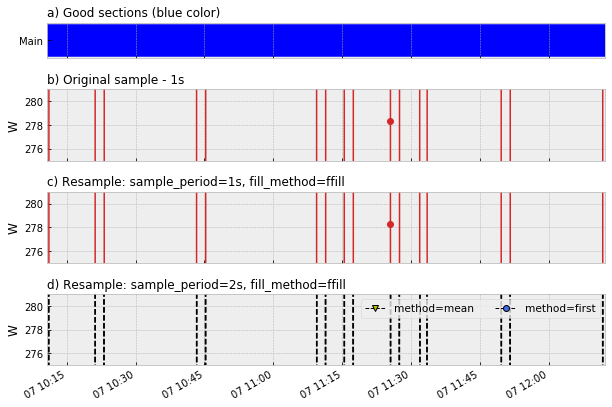

In [27]:
rcParams['figure.figsize'] = (10, 7)

#definición de fechas
ta = '2023-03-07 11:10:38+01:00' #tiempo inicial
tb = '2023-03-07 13:12:48+01:00' #tiempo final

#contador principal
Main=elec.select(instance=[1])

#definición de  gráficas
fig, (ax4, ax1, ax2, ax3) = plt.subplots(4, 1, sharex=True,
                                         gridspec_kw={'hspace': 0.5,'height_ratios':[1.5, 3, 3, 3]})


#sample a segundo
elec[1].power_series_all_data()[ta:tb].plot(ax=ax1, color='tab:red', marker="o", lw=1.5)
ax1.minorticks_off()
ax1.set_ylabel('W')
ax1.set_title('b) Original sample - 1s', fontsize=12, loc='left')
#ax1.annotate("|09:42:00 = 277 W", xy=('2022-11-22 09:42:00+01:00', 277.6),rotation=7)
ax1.set_ylim(275,281)


#sample a 1 segundo metodo fill
elec[1].power_series_all_data(sample_period=1, resample_kwargs={'fill_method': 'ffill'})[ta:tb].plot(ax=ax2, marker="o", color='tab:red',lw=1.5)
ax2.minorticks_off()
ax2.set_ylabel('W')
ax2.set_title('c) Resample: sample_period=1s, fill_method=ffill', fontsize=12, loc='left')
#ax2.annotate("|09:42:00 = 277 W", xy=('2022-11-22 09:42:00+01:00', 277.6))
ax2.set_ylim(275,281)



#sample a 2 segundos metodo fill
elec[1].power_series_all_data(sample_period=4,resample_kwargs={'how': 'first'})[ta:tb].plot(ax=ax3, color='k', lw=1.5, ls='--', marker="o",
                                                           markersize=8, markerfacecolor='royalblue')
elec[1].power_series_all_data(sample_period=4, resample_kwargs={'how': 'mean'})[ta:tb].plot(ax=ax3, color='k', lw=1.5, ls='--', marker="v",
                          markersize=8, markerfacecolor='y')
ax3.minorticks_off()
ax3.set_ylabel('W')
ax3.set_title('d) Resample: sample_period=2s, fill_method=ffill', fontsize=12, loc='left')
ax3.set_ylim(275,281)


#good sections
import matplotlib.lines as mlines
line1 = mlines.Line2D([], [], lw=1, c='k', ls='--', marker="o", markersize=6, markerfacecolor='royalblue', label='method=first')
line2 = mlines.Line2D([], [], lw=1, c='k', ls='--', marker="v", markersize=6, markerfacecolor='y', label='method=mean')
ax3.legend(handles=[line2, line1], fontsize=10.5, ncol=2)
ax4=Main.plot_good_sections(ax=ax4)
ax4.set_yticklabels(list(Meters.values()))
ax4.grid(axis='y')
ax4.set_title('a) Good sections (blue color)', fontsize=12, loc='left')
#l=['11:56:20','11:56:25','11:56:30','11:56:35','11:56:40','11:56:45','11:56:50']
#ax4.set_xticklabels(l, rotation=30, ha='right')

#guarda gráfico
plt.savefig('./data/images/3.1_Prepros_1.svg', bbox_inches='tight', transparent=True)
pass

## Filtros de dispositivos eléctricos

Vamos a filtrar por aquellos dispositivos cuya potencia activa sea superior a 5,85kwh

In [16]:
Devices=elec.select(instance=[2,3,4,5,6,7,8,9,10,11]) #MeterGroup de dispositivos
d=Devices.energy_per_meter().loc['active']  #energía kWh
d[d>5.85] #filtra dispositivos menores o iguales a 5.85 kWh (5% consumo)

10/10 ElecMeter(instance=11, building=1, dataset='dsualmh', appliances=[Appliance(type='freezer', instance=1)])instance=1)])

Series([], Name: active, dtype: float64)

Vemos  el top-k entre los dispositivos electricos conectados

In [17]:
Devices = elec.select(instance=[2,3,4,5,6,7,8,9,10,11])
Devices.select_top_k(k=5)

10/10 ElecMeter(instance=11, building=1, dataset='dsualmh', appliances=[Appliance(type='freezer', instance=1)])instance=1)])

MeterGroup(meters=
  ElecMeter(instance=8, building=1, dataset='dsualmh', appliances=[Appliance(type='electric shower heater', instance=1)])
  ElecMeter(instance=2, building=1, dataset='dsualmh', appliances=[Appliance(type='electric furnace', instance=1)])
  ElecMeter(instance=7, building=1, dataset='dsualmh', appliances=[Appliance(type='electric space heater', instance=1)])
  ElecMeter(instance=5, building=1, dataset='dsualmh', appliances=[Appliance(type='kettle', instance=1)])
  ElecMeter(instance=3, building=1, dataset='dsualmh', appliances=[Appliance(type='microwave', instance=1)])
)

## División del dataset

- train: conjunto de datos de entrenamiento de modelos de desagregación
- test: conjunto de datos de validación y pruebas de modelos de desagregación

Entrenamiento:

In [18]:
train = DataSet('dsualmh.h5')

train.set_window(start="2023-03-07 11:10:38", end="2023-03-07 13:12:15")

train_elec=train.buildings[1].elec

train_elec.get_timeframe()

TimeFrame(start='2023-03-07 11:10:38+01:00', end='2023-03-07 13:12:15+01:00', empty=False)

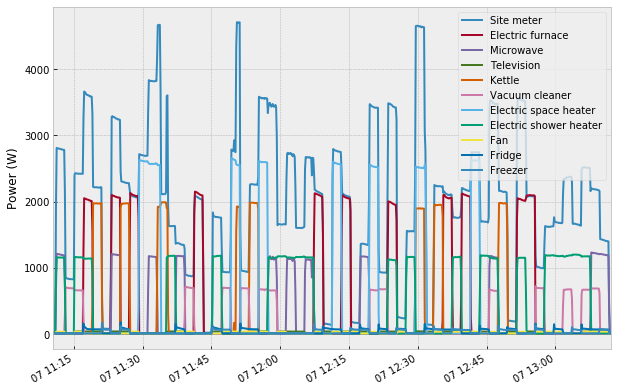

In [19]:
train_elec.plot()
#no hay datos train_elec.submeters().plot()



Validación:

In [20]:
 #Validación 

valid = DataSet('dsualmh.h5')

valid.set_window(start="2023-03-07 12:10:38", end="2023-03-07 12:41:26")

valid_elec=valid.buildings[1].elec

valid_elec.get_timeframe()

TimeFrame(start='2023-03-07 12:10:38+01:00', end='2023-03-07 12:41:26+01:00', empty=False)

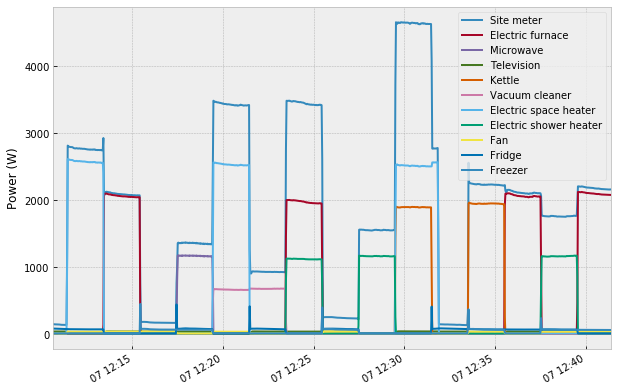

In [21]:
valid_elec.mains().plot()
valid_elec.submeters().plot()

Pruebas

In [22]:
test = DataSet('dsualmh.h5') #Pruebas

test.set_window(start="2023-03-07 12:41:26", end="2023-03-07 13:12:15")

test_elec=test.buildings[1].elec

test_elec.get_timeframe()

TimeFrame(start='2023-03-07 12:41:26+01:00', end='2023-03-07 13:12:15+01:00', empty=False)

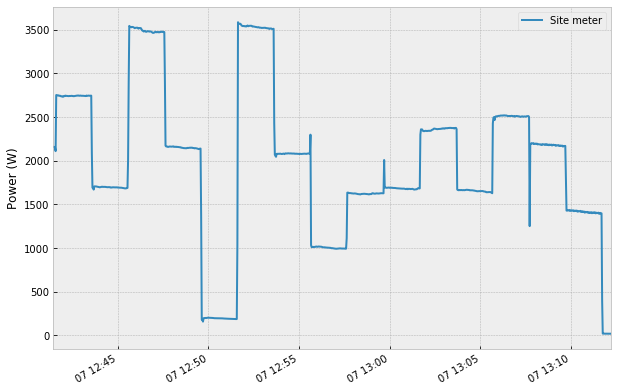

In [23]:
test_elec.mains().plot()